In [10]:
import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
older = random_kid()
if older == Kid.GIRL:
    older_girl += 1
if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either): ", both_girls / either_girl)

P(both | older): 1.0
P(both | either):  1.0


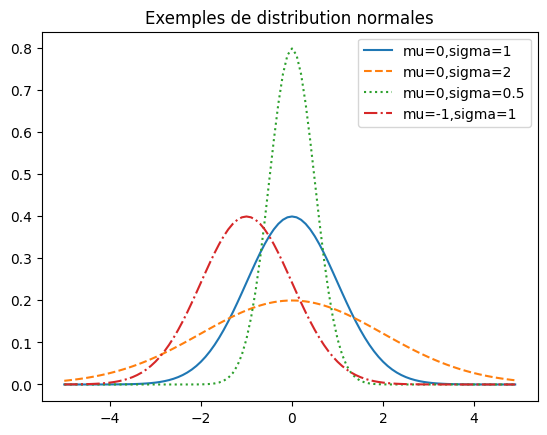

In [11]:
# Normal distribution
# Esperance (mu)
# ecart-type (sigma)
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title('Exemples de distribution normales')
plt.show()



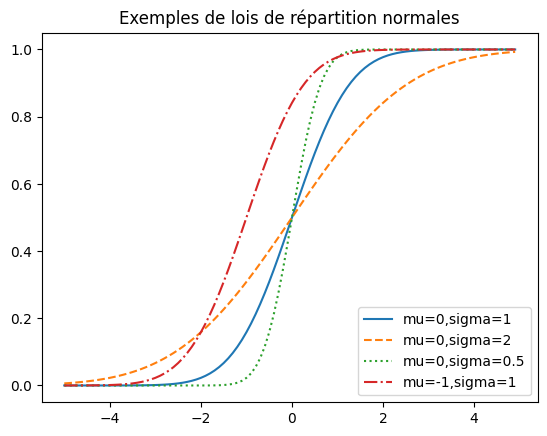

In [12]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # en bas à droite
plt.title("Exemples de lois de répartition normales")
plt.show()

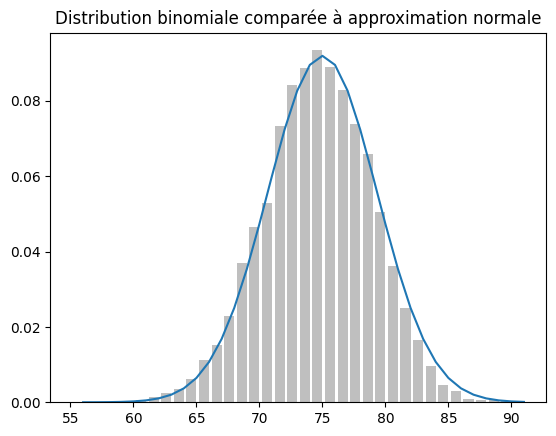

In [13]:
def bernoulli_trial(p: float) -> int:
    """Return 1 with a probability p and 0 with a probability 1-p"""
    return 1 if random.random() < p else 0
def binomial(n: int, p: float) -> int:
    """returns the sum of n Bernoulli trials (p)"""
    return sum(bernoulli_trial(p) for _ in range(n))

from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Binomial distribution compared to normal approximation"""
    data = [binomial(n, p) for _ in range(num_points)]
    # bar chart showing examples of binomial distribution
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # curve representing the approximation of the normal distribution
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
        for i in xs]
    plt.plot(xs,ys)
    plt.title("Distribution binomiale comparée à approximation normale")
    plt.show()

binomial_histogram(0.75, 100, 10000)